In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

## Algorytm Greedy Nearest

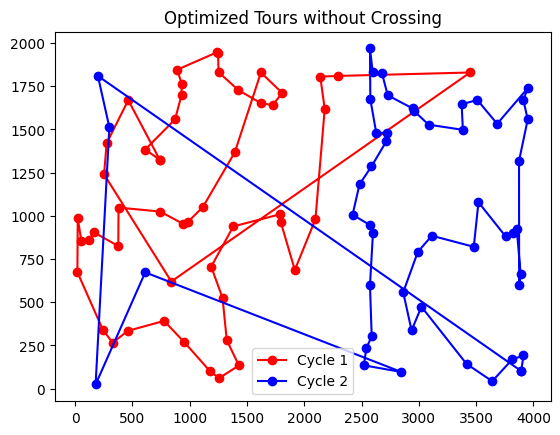

In [151]:

np.random.seed(10)

def calculate_distance(city1, city2):
    return np.round(np.linalg.norm(city1 - city2))

def create_alternate_cycles(cities):
    n = cities.shape[0]
    unvisited = list(range(n))
    
    # Randomly choose the starting point for the first cycle
    tour1 = [unvisited.pop(np.random.randint(0, len(unvisited)))]
    start_city_1 = unvisited[tour1[0]]

    # Choose the furthest city from the starting point as the initial point for the second cycle
    start_city_2_idx = np.argmax([calculate_distance(cities[tour1[0]], cities[i]) for i in unvisited])
    tour2 = [unvisited.pop(start_city_2_idx)]
    start_city_2 = unvisited[start_city_2_idx]
    
    while unvisited:
        current_city = tour1[-1]

        # Calculate distances to unvisited cities
        distances1 = [calculate_distance(cities[current_city], cities[j]) for j in unvisited]
        closest_city1 = unvisited.pop(np.argmin(distances1))
        tour1.append(closest_city1)
    
        if unvisited:
            current_city = tour2[-1]

            # Calculate distances to unvisited cities
            distances2 = [calculate_distance(cities[current_city], cities[j]) for j in unvisited]
            closest_city2 = unvisited.pop(np.argmin(distances2))
            tour2.append(closest_city2)

    return tour1, tour2

def plot_optimized_tours(positions, cycle1, cycle2):
    # Ensure the cycles start and end at the same city to form closed loops
    cycle1.append(cycle1[0])
    cycle2.append(cycle2[0])

    # Plot the optimized tours
    plt.plot(positions[cycle1, 0], positions[cycle1, 1], linestyle='-', marker='o', color='r', label='Cycle 1')
    plt.plot(positions[cycle2, 0], positions[cycle2, 1], linestyle='-', marker='o', color='b', label='Cycle 2')

    # Add legend and title
    plt.legend()
    plt.title('Optimized Tours without Crossing')
    plt.show()

# Load data from CSV file
data = pd.read_csv('kroa.csv', sep=' ')
positions = np.array([data['x'], data['y']]).T

# # Add text box with information
# N = data.shape[0]
# total_length_cycle1 = sum(calculate_distance(positions[cycle1[i-1]], positions[cycle1[i]]) for i in range(N))
# total_length_cycle2 = sum(calculate_distance(positions[cycle2[i-1]], positions[cycle2[i]]) for i in range(N))
# textstr = "N nodes: %d\nTotal length cycle 1: %.3f\nTotal length cycle 2: %.3f" % (N, total_length_cycle1, total_length_cycle2)
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# ax[1].text(0.05, 0.95, textstr, transform=ax[1].transAxes, fontsize=14, verticalalignment='top', bbox=props)

# Create two separate cycles without lines crossing
cycle1, cycle2 = create_alternate_cycles(positions)

# Plot the optimized tours
plot_optimized_tours(positions, cycle1, cycle2)

## Algorytm Greedy

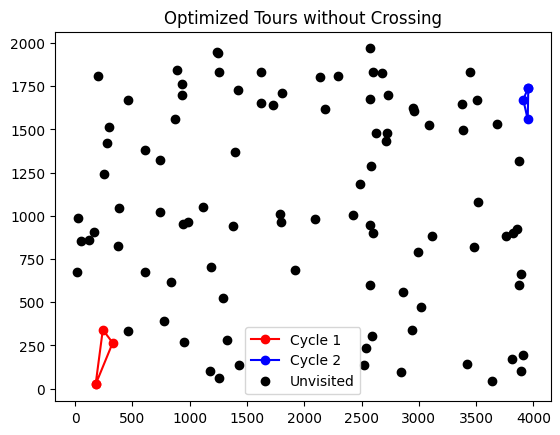

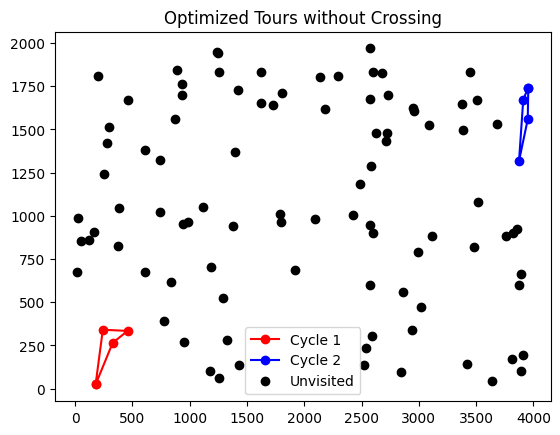

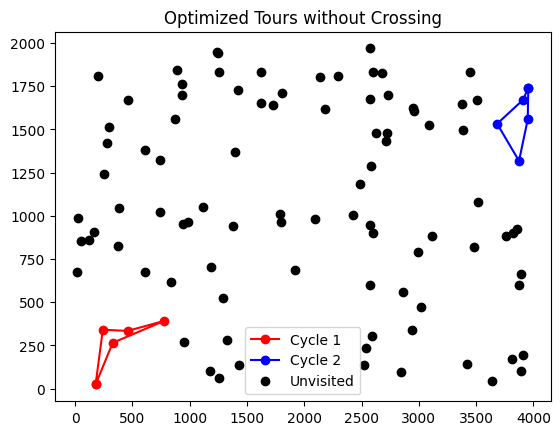

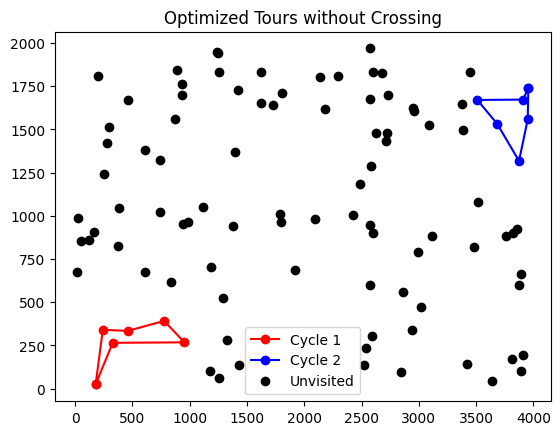

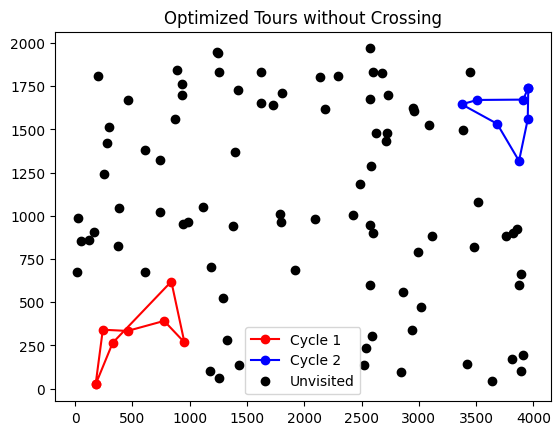

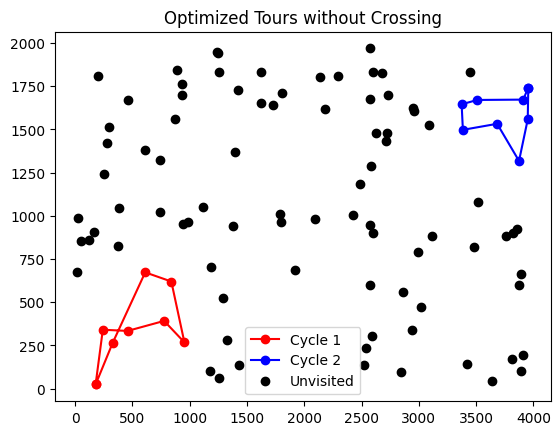

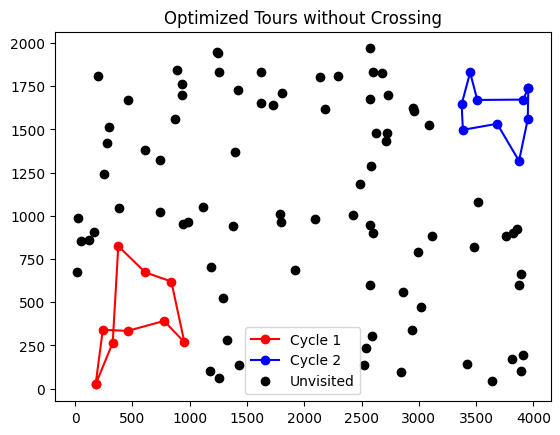

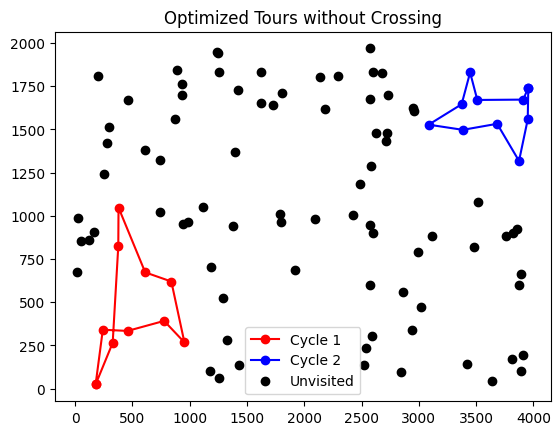

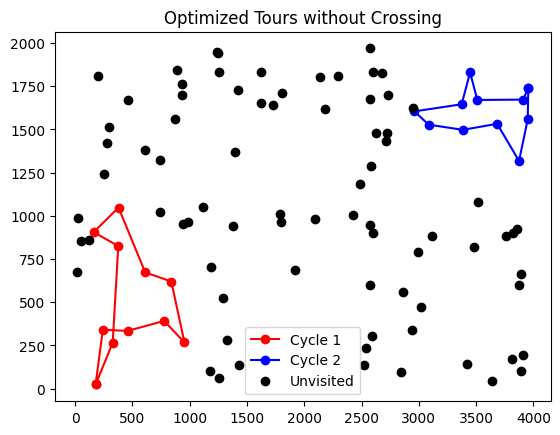

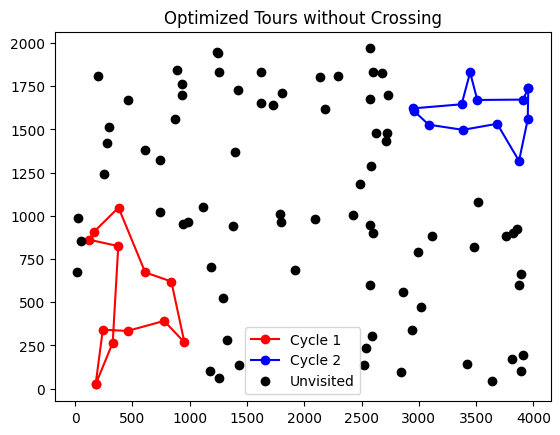

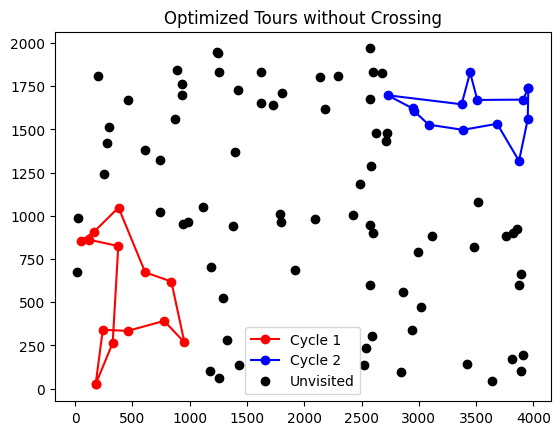

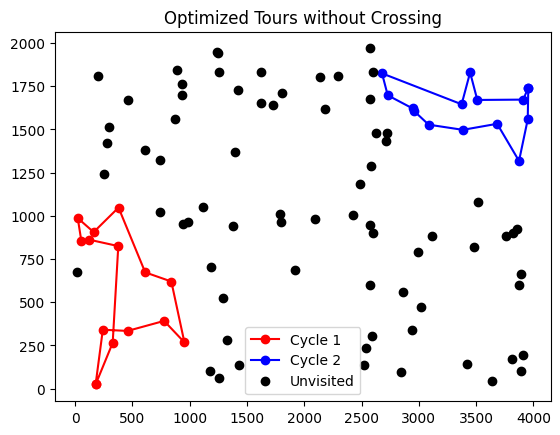

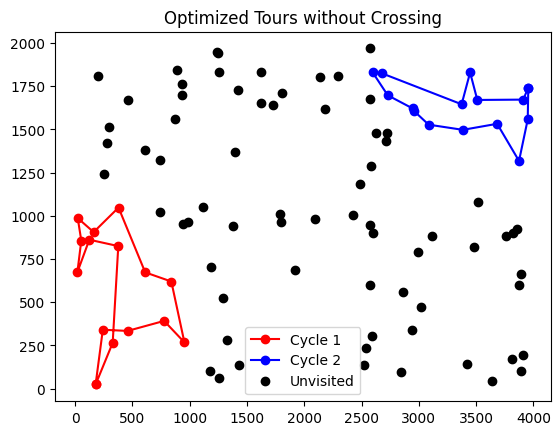

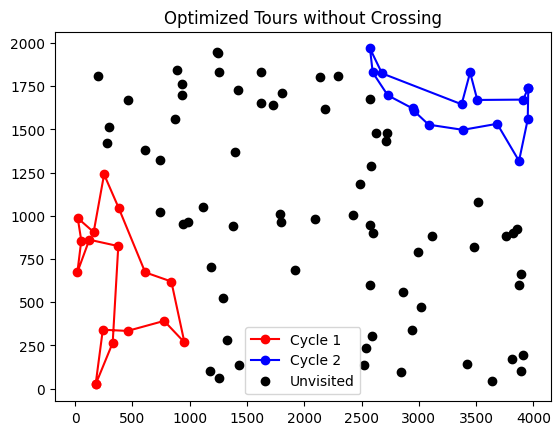

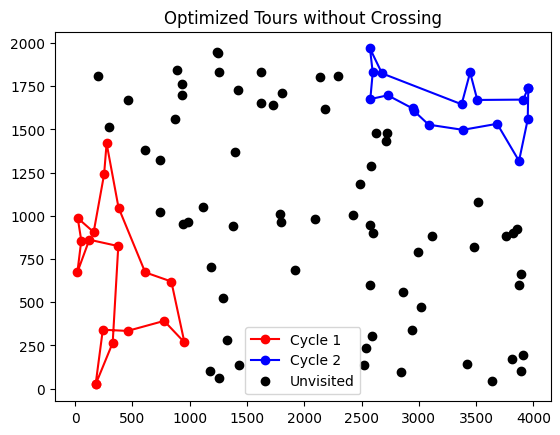

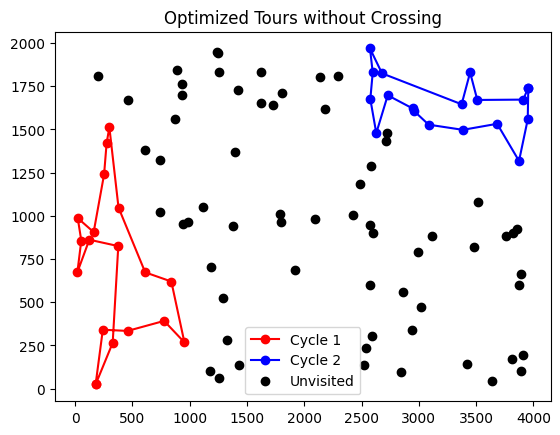

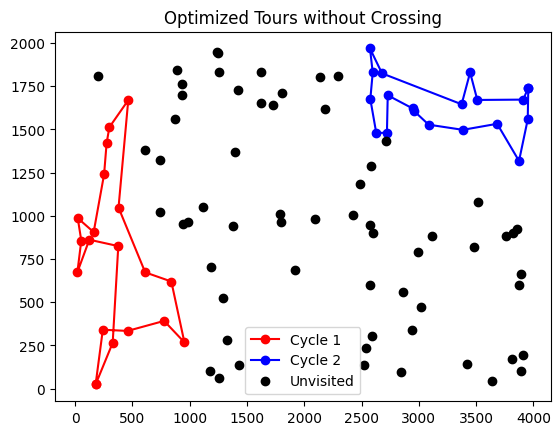

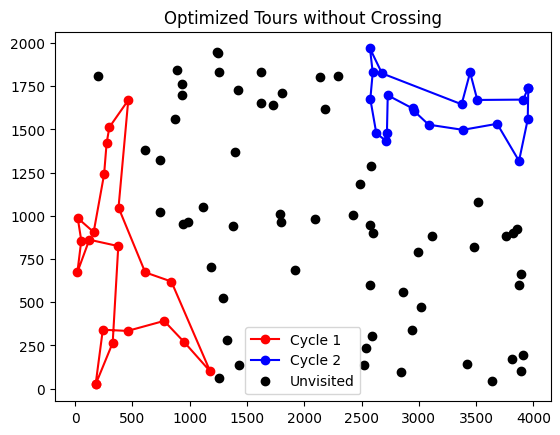

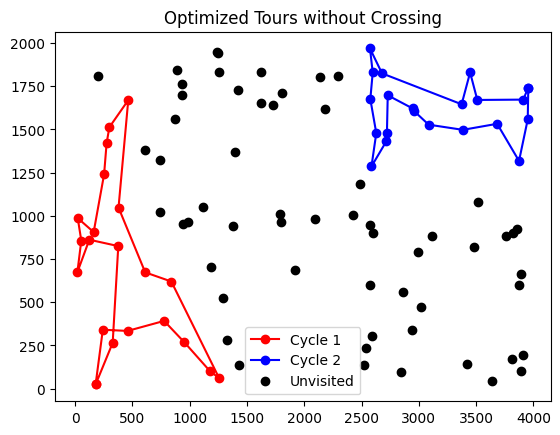

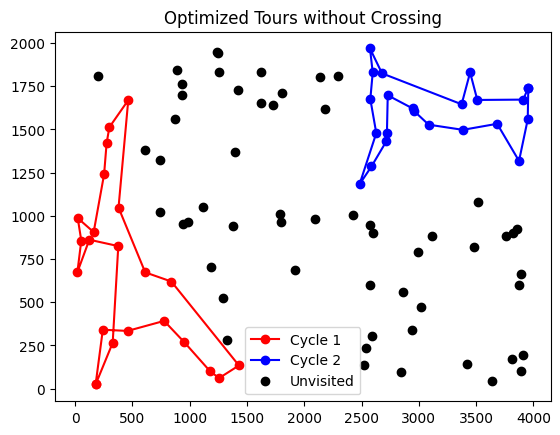

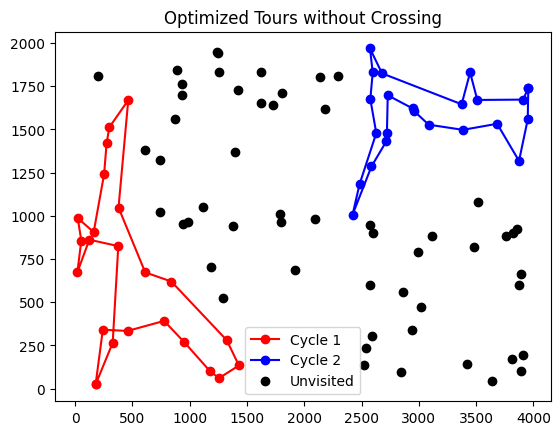

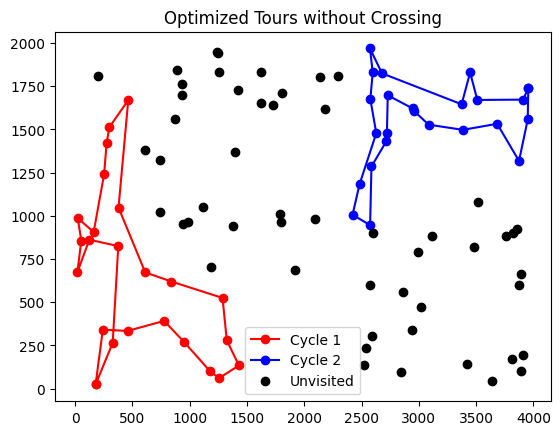

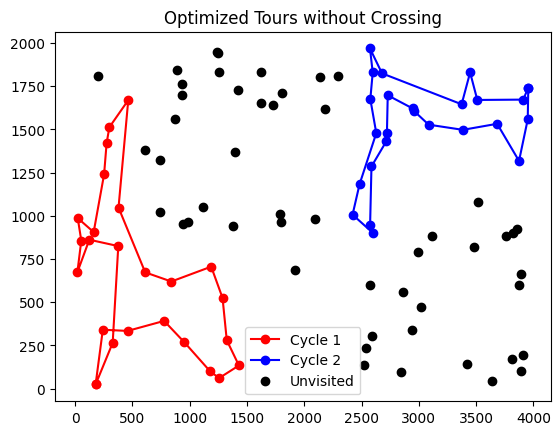

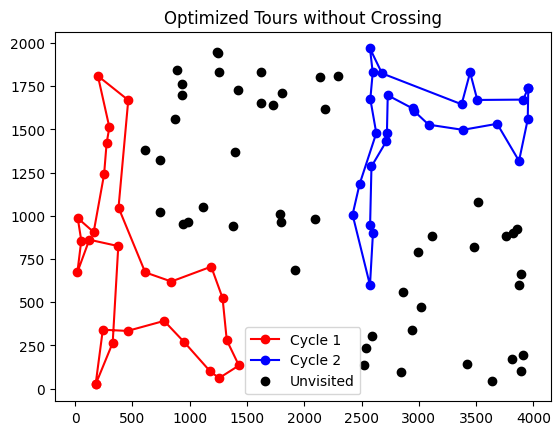

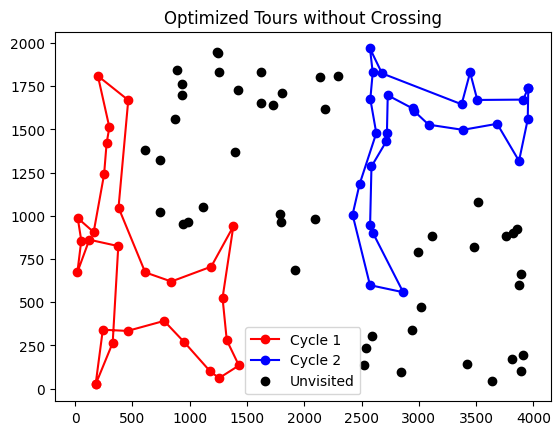

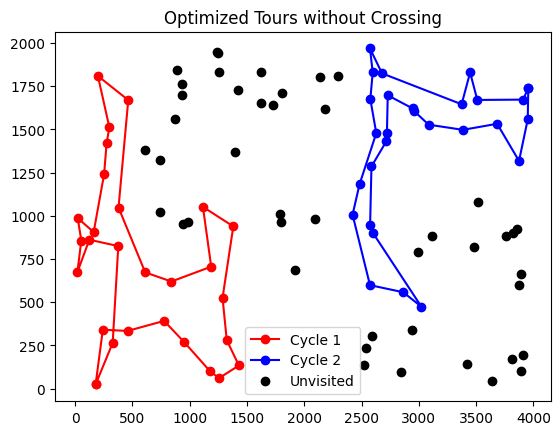

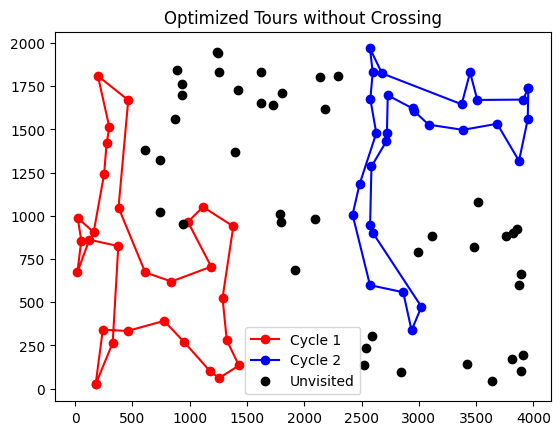

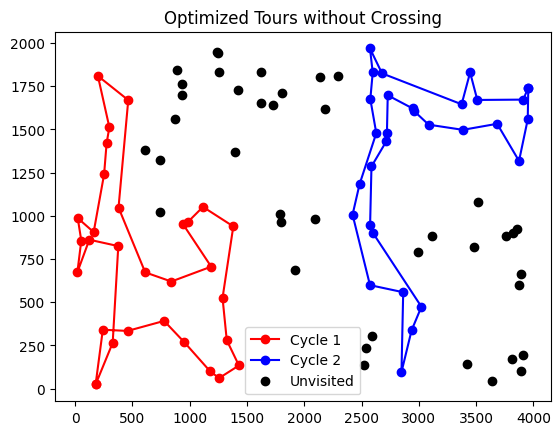

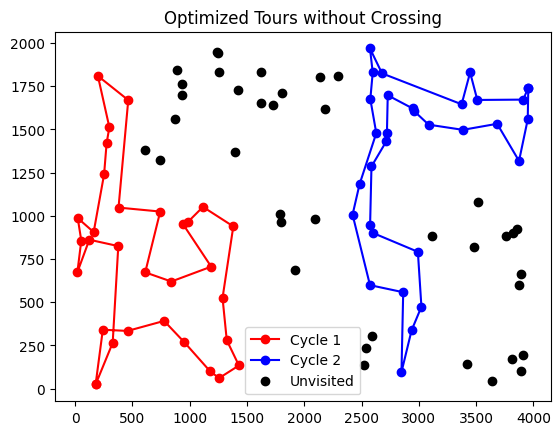

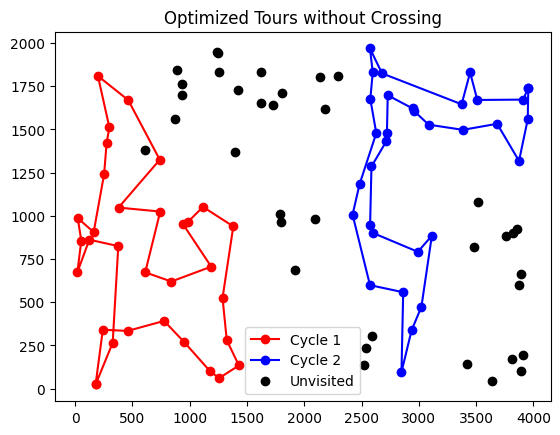

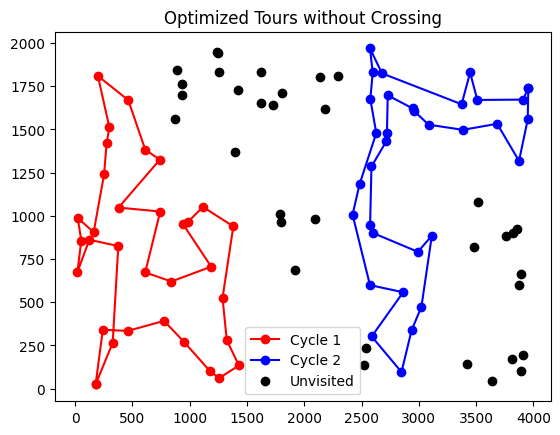

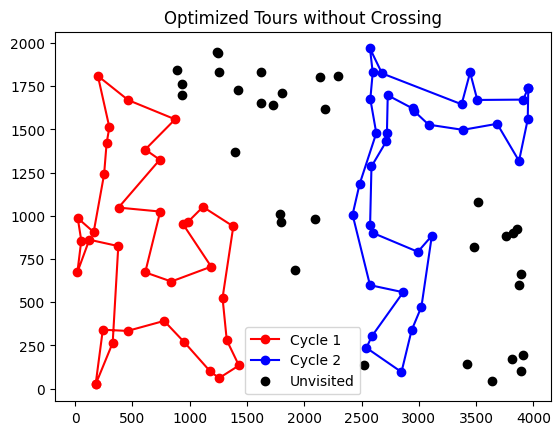

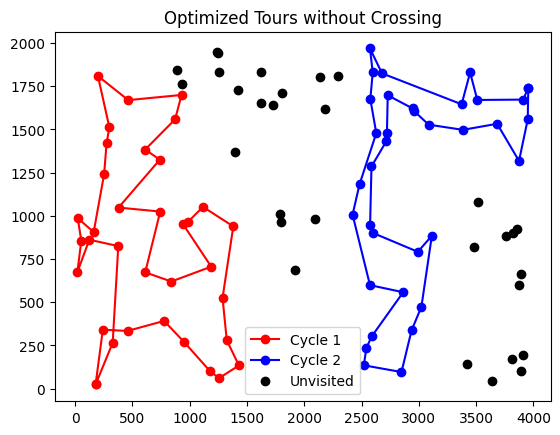

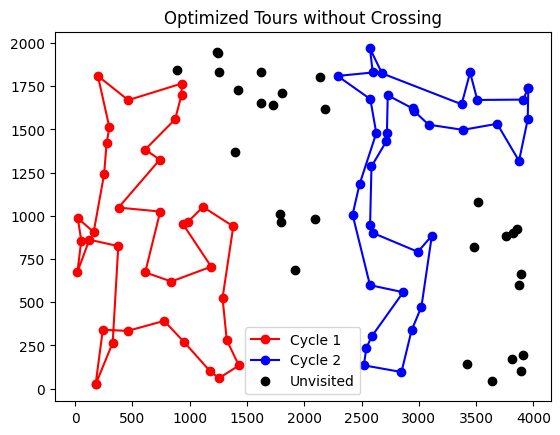

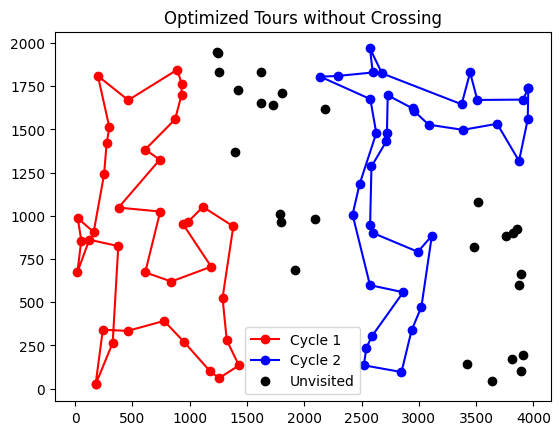

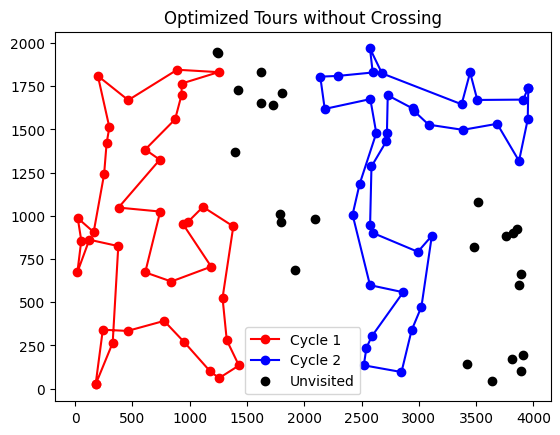

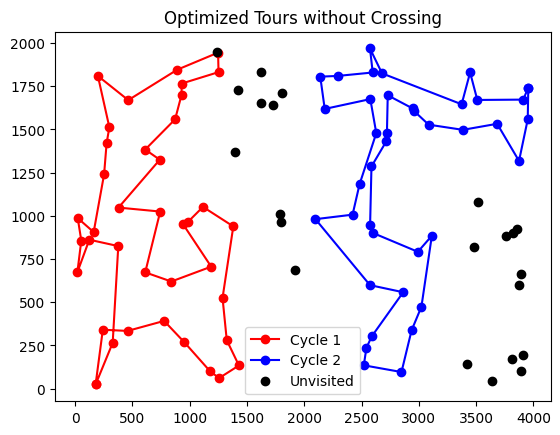

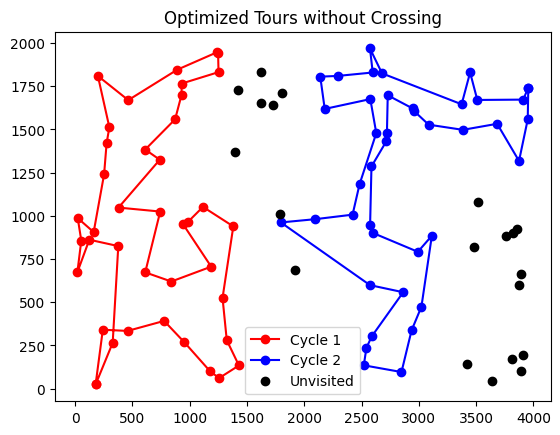

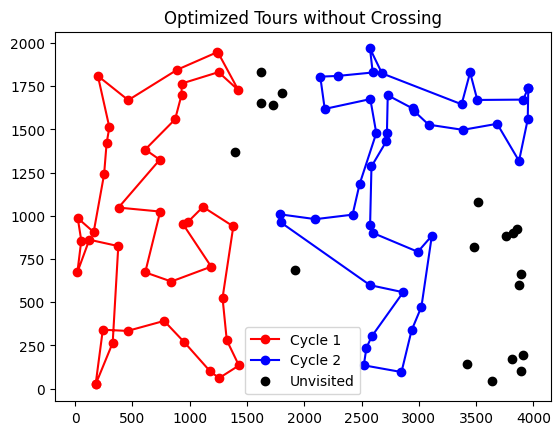

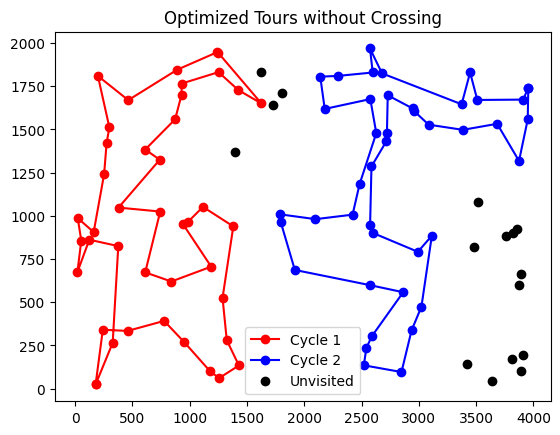

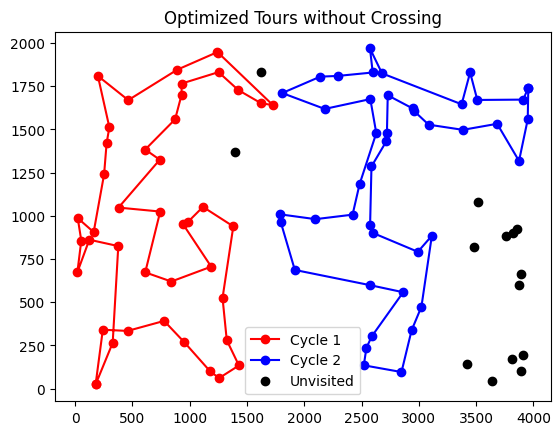

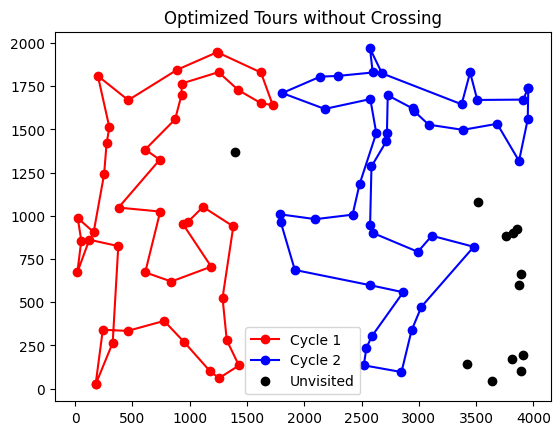

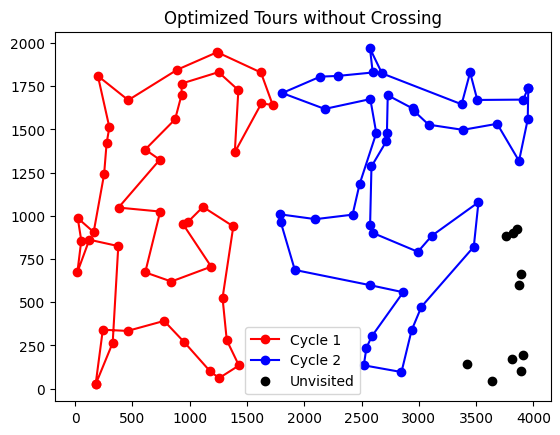

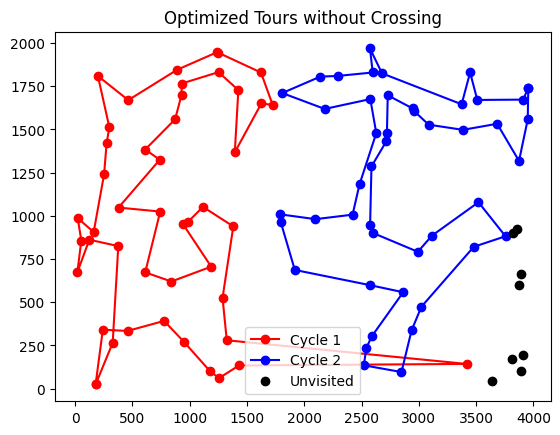

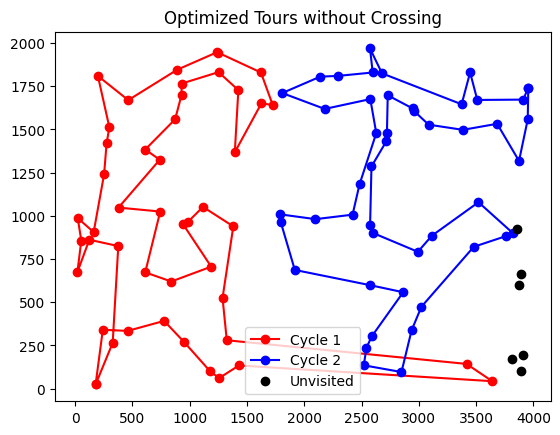

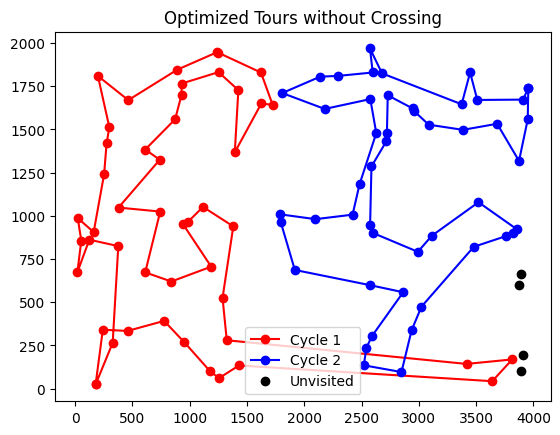

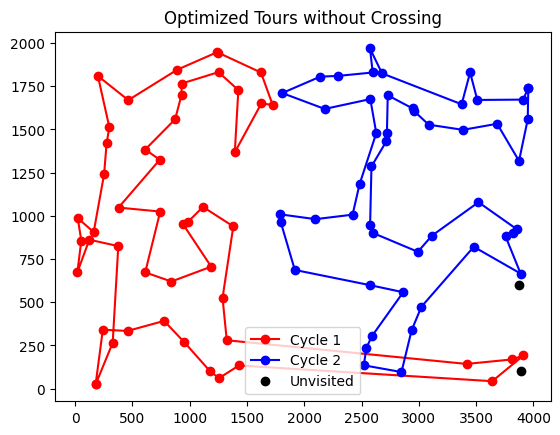

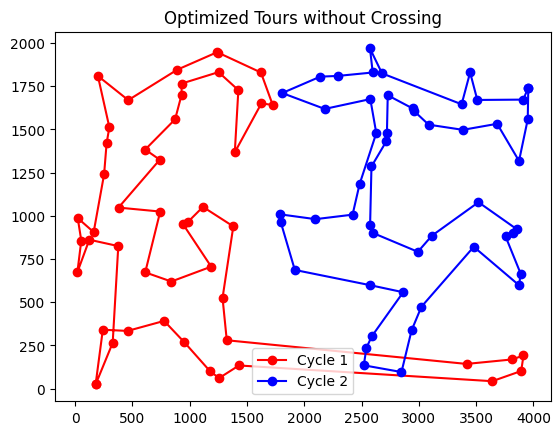

In [27]:

np.random.seed(11)

def calculate_distance(city1, city2):
    return np.round(np.linalg.norm(city1 - city2))

def plot_current_tours_to_file(positions, tour1, tour2,unvisited):
    # Ensure the cycles start and end at the same city to form closed loops
    cycle1 = tour1.copy()
    cycle2 = tour2.copy()
    cycle1.append(cycle1[0])
    cycle2.append(cycle2[0])

    # Plot the optimized tours
    plt.plot(positions[cycle1, 0], positions[cycle1, 1], linestyle='-', marker='o', color='r', label='Cycle 1')
    plt.plot(positions[cycle2, 0], positions[cycle2, 1], linestyle='-', marker='o', color='b', label='Cycle 2')
    plt.plot(positions[unvisited, 0], positions[unvisited, 1], linestyle=' ', marker='o', color='k', label='Unvisited')

    # Add legend and title
    plt.legend()
    plt.title('Optimized Tours without Crossing')
    #plt.savefig('results/step'+str(len(cycle1))+'.png')
    plt.show()
    plt.close()

def create_greedy_cycles(cities):
    n = cities.shape[0]
    unvisited = list(range(n))
    
    # Randomly choose the starting point for the first cycle
    tour1 = [unvisited.pop(np.random.randint(0, len(unvisited)))]
    start_city_1 = unvisited[tour1[0]]
    nearest_to_first_1 = [calculate_distance(cities[tour1[0]], cities[j]) for j in unvisited]
    tour1.append(unvisited.pop(np.argmin(nearest_to_first_1)))

    # Choose the furthest city from the starting point as the initial point for the second cycle
    start_city_2_idx = np.argmax([calculate_distance(cities[tour1[0]], cities[i]) for i in unvisited])
    tour2 = [unvisited.pop(start_city_2_idx)]
    start_city_2 = unvisited[start_city_2_idx]
    nearest_to_first_2 = [calculate_distance(cities[tour2[0]], cities[j]) for j in unvisited]
    tour2.append(unvisited.pop(np.argmin(nearest_to_first_2)))

    # Add third point to both tours
    nearest_to_tour_1 = [calculate_distance(cities[tour1[0]], cities[j]) + calculate_distance(cities[tour1[1]], cities[j]) for j in unvisited]
    tour1.append(unvisited.pop(np.argmin(nearest_to_tour_1)))

    nearest_to_tour_2 = [calculate_distance(cities[tour2[0]], cities[j]) + calculate_distance(cities[tour2[1]], cities[j]) for j in unvisited]
    tour2.append(unvisited.pop(np.argmin(nearest_to_tour_2)))

    # Start adding points that are best fit for the graph
    while unvisited:
        #current_city = tour1[-1]
        positions = np.array([data['x'], data['y']]).T
        plot_current_tours_to_file(positions, tour1, tour2, unvisited)
        # current_cycle_distance_1=[]
        # for x in range(len(tour1)-1):
        #     current_cycle_distance_1.append(calculate_distance(cities[tour1[x]], cities[tour1[x+1]]))
        # max_distance_1=np.sum(current_cycle_distance_1)

        # current_cycle_distance_2=[]
        # for x in range(len(tour2)-1):
        #     current_cycle_distance_2.append(calculate_distance(cities[tour2[x]], cities[tour2[x+1]]))
        # max_distance_2=np.sum(current_cycle_distance_2)

        # Find nearest point for every point in the tour, then pick the smallest one
        possible_points = []
        smallest_value = float('inf')
        best_point = -1
        for tour_point in tour1:
            nearest_points = [calculate_distance(cities[tour_point], cities[j]) for j in unvisited]
            if min(nearest_points) < smallest_value:
                best_point = np.argmin(nearest_points)
                smallest_value = min(nearest_points)
                #print("best",unvisited[best_point],smallest_value)
        best_point = unvisited.pop(best_point)
        #print("best_point",best_point)

        # Find all distances between points
        tour_distances = []
        for i in range(len(tour1)):
            if i == len(tour1) - 1:
                tour_distances.append(calculate_distance(cities[tour1[-1]], cities[tour1[0]]))
            else:
                tour_distances.append(calculate_distance(cities[tour1[i]], cities[tour1[i+1]]))

        # find smallest increase in distance when adding new point
        best_index = -1
        best_distance = calculate_distance(cities[best_point], cities[tour1[0]]) + calculate_distance(cities[best_point], cities[tour1[-1]]) - calculate_distance(cities[tour1[0]], cities[tour1[-1]])

        for i in range(len(tour_distances)-1):
            if(calculate_distance(cities[best_point], cities[tour1[i]]) + calculate_distance(cities[best_point], cities[tour1[i+1]]) - calculate_distance(cities[tour1[i]], cities[tour1[i+1]]) < best_distance):
                best_index = i + 1
                best_distance = calculate_distance(cities[best_point], cities[tour1[i]]) + calculate_distance(cities[best_point], cities[tour1[i+1]]) - calculate_distance(cities[tour1[i]], cities[tour1[i+1]])

        # add new point to the tour with smallest increase in path
        if(best_index == -1):
            tour1.append(best_point)
        else:
            tour1.insert(best_index,best_point)
        #####
        ##### TU SKOŃCZYŁEM    
        #####
    
        if unvisited:
            possible_points = []
            smallest_value = float('inf')
            best_point = -1
            for tour_point in tour2:
                nearest_points = [calculate_distance(cities[tour_point], cities[j]) for j in unvisited]
                if min(nearest_points) < smallest_value:
                    best_point = np.argmin(nearest_points)
                    smallest_value = min(nearest_points)
                    #print("best",unvisited[best_point],smallest_value)
            best_point = unvisited.pop(best_point)
            #print("best_point",best_point)

            # Find all distances between points
            tour_distances = []
            for i in range(len(tour2)):
                if i == len(tour2) - 1:
                    tour_distances.append(calculate_distance(cities[tour2[-1]], cities[tour2[0]]))
                else:
                    tour_distances.append(calculate_distance(cities[tour2[i]], cities[tour2[i+1]]))

            # find smallest increase in distance when adding new point
            best_index = -1
            best_distance = calculate_distance(cities[best_point], cities[tour2[0]]) + calculate_distance(cities[best_point], cities[tour2[-1]]) - calculate_distance(cities[tour2[0]], cities[tour2[-1]])

            for i in range(len(tour_distances) - 1):
                if(calculate_distance(cities[best_point], cities[tour2[i]]) + calculate_distance(cities[best_point], cities[tour2[i+1]]) - tour_distances[i] < best_distance):
                    best_index = i + 1
                    best_distance = calculate_distance(cities[best_point], cities[tour2[i]]) + calculate_distance(cities[best_point], cities[tour2[i+1]]) - tour_distances[i]

            # add new point to the tour with smallest increase in path

            if(len(unvisited) == 0):
                tour2.insert(best_index,best_point)
            else:
                if(best_index == -1):
                    tour2.append(best_point)
                else:
                    tour2.insert(best_index,best_point)

    return tour1, tour2

def plot_optimized_tours(positions, cycle1, cycle2):
    # Ensure the cycles start and end at the same city to form closed loops
    cycle1.append(cycle1[0])
    cycle2.append(cycle2[0])

    # Plot the optimized tours
    plt.plot(positions[cycle1, 0], positions[cycle1, 1], linestyle='-', marker='o', color='r', label='Cycle 1')
    plt.plot(positions[cycle2, 0], positions[cycle2, 1], linestyle='-', marker='o', color='b', label='Cycle 2')

    # Add legend and title
    plt.legend()
    plt.title('Optimized Tours without Crossing')
    plt.show()

# Load data from CSV file
data = pd.read_csv('kroa.csv', sep=' ')
positions = np.array([data['x'], data['y']]).T

# # Add text box with information
# N = data.shape[0]
# total_length_cycle1 = sum(calculate_distance(positions[cycle1[i-1]], positions[cycle1[i]]) for i in range(N))
# total_length_cycle2 = sum(calculate_distance(positions[cycle2[i-1]], positions[cycle2[i]]) for i in range(N))
# textstr = "N nodes: %d\nTotal length cycle 1: %.3f\nTotal length cycle 2: %.3f" % (N, total_length_cycle1, total_length_cycle2)
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# ax[1].text(0.05, 0.95, textstr, transform=ax[1].transAxes, fontsize=14, verticalalignment='top', bbox=props)

# Create two separate cycles without lines crossing
cycle1, cycle2 = create_greedy_cycles(positions)

# Plot the optimized tours
plot_optimized_tours(positions, cycle1, cycle2)

## Algorytm 2-regret

In [153]:
# code